<a href="https://colab.research.google.com/github/DL-WG/ROMS-tutorial/blob/main/MNIST_AE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MNIST with a fully-connected autoencoder: example
Thursday 4th March 2021

In [2]:
import tensorflow.keras as tf
from keras.datasets.mnist import load_data
import matplotlib.pyplot as plt
!pip install eofs
import eofs
from eofs.standard import Eof
import numpy as np

     |████████████████████████████████| 1.0MB 5.5MB/s 
  Created wheel for eofs: filename=eofs-1.4.0-cp37-none-any.whl size=1100357 sha256=b41bb6d20fa21f96574ea18a1ac2082e852f091f3bf293319d749e00367424d4
  Stored in directory: /root/.cache/pip/wheels/47/f8/64/72dfdafae89c380846799c1396957cddd04decf459242ea988
Successfully built eofs


In [3]:
#Load data
(Xtrain, ytrain), (Xtest, ytest) = load_data()
# summarize the shape of the dataset
print('Train', Xtrain.shape, ytrain.shape)
print('Test', Xtest.shape, ytest.shape)

11493376/11490434 [==============================] - 0s 0us/step
Train (60000, 28, 28) (60000,)
Test (10000, 28, 28) (10000,)


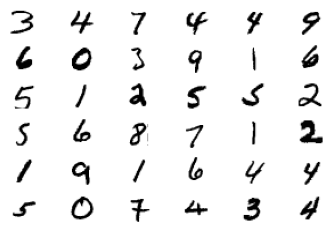

In [4]:
for i in range(36):
  plt.subplot(6,6,i+1)
  plt.imshow(Xtrain[np.random.randint(Xtrain.shape[0])], cmap='gray_r')
  plt.axis('off')

In [5]:
#Gather model data
modelDataTotal = np.concatenate((Xtrain, Xtest))
modelData = np.reshape(modelDataTotal, (modelDataTotal.shape[0], modelDataTotal.shape[1]*modelDataTotal.shape[2]))
modelData = modelData[::10, :]
modelData.shape

(7000, 784)

In [6]:
#Scale data between 0 and 1
modelDataScaled = modelData/255.0
nSnapshots = modelData.shape[0]
nFeatures = modelData.shape[1]
print(np.max(modelDataScaled))
print('Number of snapshots: ' + str(nSnapshots))
print('Number of features: ' + str(nFeatures))

1.0
Number of snapshots: 7000
Number of features: 784


In [7]:
#Get training and test data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(modelDataScaled, modelDataScaled, test_size=0.1, shuffle=True, random_state=42)

#X_train = np.expand_dims(X_train)
#X_test = np.expand_dims(X_test)

In [9]:
#Define model
input_enc = tf.Input(shape=(nFeatures))
enc = tf.layers.Dense(128)(input_enc)
enc = tf.layers.Dense(64)(enc)

enc_output = tf.layers.Reshape((1, 64))(enc)

input_dec = tf.Input(shape=(1, 64))
dec = tf.layers.Dense(128)(input_dec)
dec = tf.layers.Dense(nFeatures, activation='sigmoid')(dec)

#Encoder model
enc_model = tf.Model(input_enc, enc_output)
enc_model.summary()
#Decoder model
dec_model = tf.Model(input_dec, dec)
dec_model.summary()
#ae model
ae_model = tf.Model(input_enc, dec_model(enc_output))

ae_model.compile(loss='mse', optimizer='adam')

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
reshape (Reshape)            (None, 1, 64)             0         
Total params: 108,736
Trainable params: 108,736
Non-trainable params: 0
_________________________________________________________________
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 1, 64)]           0         
______________________________________

In [10]:
history = ae_model.fit(X_train, y_train, epochs=100, batch_size=512, verbose=2, validation_data = (X_test, y_test), shuffle = True)


Epoch 1/100
13/13 - 14s - loss: 0.1537 - val_loss: 0.0731
Epoch 2/100
13/13 - 12s - loss: 0.0719 - val_loss: 0.0677
Epoch 3/100
13/13 - 12s - loss: 0.0689 - val_loss: 0.0661
Epoch 4/100
13/13 - 12s - loss: 0.0677 - val_loss: 0.0655
Epoch 5/100
13/13 - 12s - loss: 0.0670 - val_loss: 0.0650
Epoch 6/100
13/13 - 12s - loss: 0.0666 - val_loss: 0.0647
Epoch 7/100
13/13 - 12s - loss: 0.0664 - val_loss: 0.0645
Epoch 8/100
13/13 - 12s - loss: 0.0662 - val_loss: 0.0644
Epoch 9/100
13/13 - 12s - loss: 0.0661 - val_loss: 0.0645
Epoch 10/100
13/13 - 12s - loss: 0.0660 - val_loss: 0.0643
Epoch 11/100
13/13 - 12s - loss: 0.0660 - val_loss: 0.0643
Epoch 12/100
13/13 - 12s - loss: 0.0659 - val_loss: 0.0642
Epoch 13/100
13/13 - 12s - loss: 0.0659 - val_loss: 0.0642
Epoch 14/100
13/13 - 12s - loss: 0.0658 - val_loss: 0.0642
Epoch 15/100
13/13 - 12s - loss: 0.0658 - val_loss: 0.0643
Epoch 16/100
13/13 - 12s - loss: 0.0658 - val_loss: 0.0642
Epoch 17/100
13/13 - 12s - loss: 0.0657 - val_loss: 0.0641
Epoch 

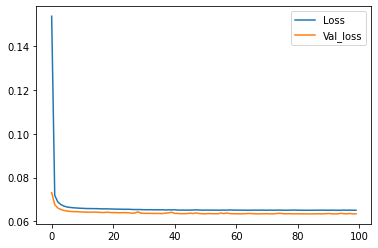

In [11]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Loss', 'Val_loss'])